In [1]:
import cv2
import numpy as np
from scipy.ndimage import rotate
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\Anaconda\envs\hdda_hw2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

(35, 40, 3)


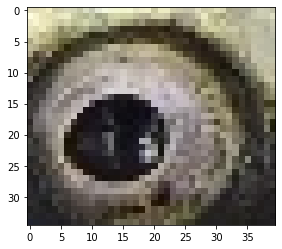

In [64]:
# image1 = cv2.imread('../data/templates/1.png')
# template1 = image1[40:75, 50:90]
# # cv2.imwrite("../data/templates/eye1.png", template1)

# image2 = cv2.imread('../data/templates/2.png')
# template2 = image2[40:75, 50:90]
# # cv2.imwrite("../data/templates/eye2.png", template2)

# image3 = cv2.imread('../data/templates/3.png')
# template3 = image3[55:90, 60:100]
# # cv2.imwrite("../data/templates/eye3.png", template3)

# image4 = cv2.imread('../data/CC Lake slice/DSC00843.jpg')
# template4 = image4[108:150, 230:280]
# print(template4.shape)
# cv2.imwrite("../data/templates/eye4.png", template4)

image5 = cv2.imread('../data/CC Lake slice/DSC00849.jpg')
template5 = image5[135:170, 270:310]
print(template5.shape)

# cv2.imwrite("../data/templates/eye5.png", template5)
plt.imshow(cv2.cvtColor(template5, cv2.COLOR_BGR2RGB))

(35, 40, 3)


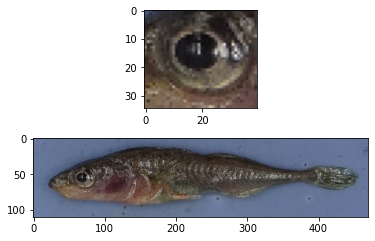

In [2]:
temp = np.copy(cv2.imread('../data/templates/eye1.png'))
image = np.copy(cv2.imread('../data/CC Lake extracted/5/DSC00839.jpg'))

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(temp.shape)

In [73]:
def match(image, temp0, slow=0.8, shigh=1.21, method =  cv2.TM_CCORR_NORMED): 
#     best_match_score = 0
#     best_res = None
#     best_scale = 0
    # also rotate template
#     img = np.copy(image)
    scales = []
    result = []
    for s in np.arange(slow, shigh, 0.1):
        s = 1
        temp = cv2.resize(temp0, None, fx = s, fy = s)
        print(temp0.shape, temp.shape)
#         temp_rot = rotate(temp, 180, mode = 'constant', reshape = False, cval = 0)
        res = cv2.matchTemplate(image, temp, method)
        print(image.shape, temp.shape, res.shape)
#         res_rot = cv2.matchTemplate(image, temp_rot, method)
#         cv2.normalize(res, res, 1, 0, cv2.NORM_MINMAX, -1)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(res, None)
        print(s, maxVal, maxLoc)
        scales.append(s)
        result.append(res)
        matchLoc = maxLoc
#         image_out = cv2.rectangle(np.copy(image), matchLoc, (matchLoc[0] + temp.shape[1], matchLoc[1] + temp.shape[0]), (0, 0, 255), 2)
        image_out = np.copy(image)[matchLoc[1]:matchLoc[1] + temp.shape[0], matchLoc[0]:matchLoc[0] + temp.shape[1]]
        cv2.imwrite('../data/templates/DSC00849_bestmatch.png', image_out)
        fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
        ax0.imshow(temp, cmap = plt.cm.gray)
        ax1.imshow(res, cmap = plt.cm.gray)
        ax2.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB)) 
#         if res.max() >= best_match_score:
#             best_match_score = res.max()
#             best_res = res
#             best_scale = s 
#             best_temp = temp
#         elif res_rot.max() >= best_match_score:
#             best_match_score = res_rot.max()
#             best_res = res_rot
#             best_scale = s 
#             best_temp = temp_rot
#     return (temp)

(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8892140984535217 (328, 93)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8892140984535217 (328, 93)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8892140984535217 (328, 93)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8892140984535217 (328, 93)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8892140984535217 (328, 93)


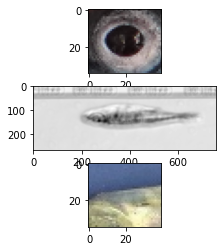

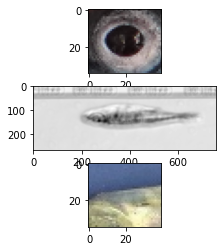

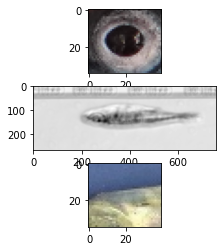

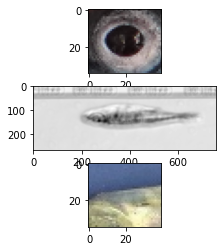

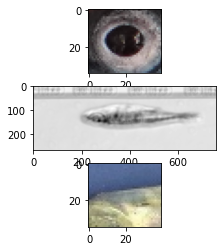

In [84]:
temp5 = cv2.imread('../data/templates/eye3.png')
# temp5 = cv2.cvtColor(temp, cv2.COLOR_BGR2HSV)
image = cv2.imread('../data/CC Lake slice/DSC00849.jpg')
# iamge = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# image = cv2.imread('../data/templates/eye5.png')
# img = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
match(image, temp5, method = cv2.TM_CCORR_NORMED)

In [113]:
# calculate the correlation between bestmatched
temp5 = cv2.imread('../data/templates/eye3.png')
# temp5 = cv2.cvtColor(temp, cv2.COLOR_BGR2HSV)
image = cv2.imread('../data/CC Lake Slice/DSC00839.jpg')
# img = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
res = cv2.matchTemplate(image, temp5, method = cv2.TM_CCORR_NORMED)
print(res)

[[0.86766386 0.8676622  0.86754197 ... 0.86108756 0.8617886  0.86212796]
 [0.86751485 0.86750424 0.86722416 ... 0.8620322  0.86291206 0.86363935]
 [0.86701745 0.8671055  0.8669373  ... 0.86346155 0.8646161  0.8652678 ]
 ...
 [0.8624907  0.8622319  0.8619627  ... 0.86164564 0.86167926 0.8616579 ]
 [0.86263084 0.86234754 0.8620584  ... 0.8616226  0.8617032  0.8617228 ]
 [0.86251783 0.86233497 0.8623845  ... 0.8612912  0.86143756 0.86166674]]


In [93]:
# print(np.linalg.norm(temp5))
a = temp5 / np.linalg.norm(temp5)
b = image / np.linalg.norm(image)
print(np.sum(a*b))
# val = np.sum(temp5*image)/np.sqrt(temp5**2 * image**2)
# print(val)

0.8892139578947673


(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8918382525444031 (129, 256)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8918382525444031 (129, 256)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8918382525444031 (129, 256)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8918382525444031 (129, 256)
(35, 40, 3) (35, 40, 3)
(300, 800, 3) (35, 40, 3) (266, 761)
1 0.8918382525444031 (129, 256)


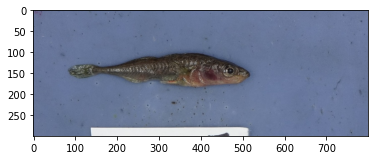

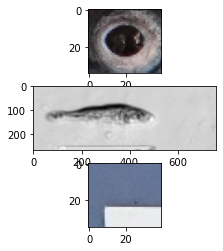

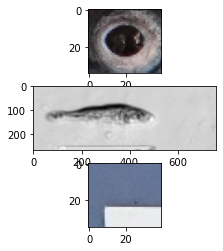

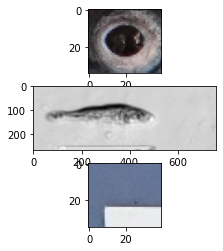

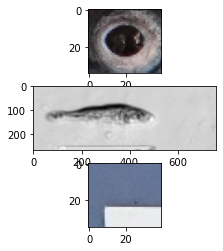

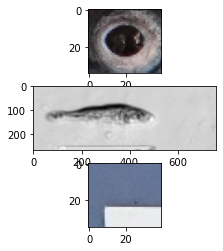

In [145]:
# threshold image? remove the blue thing
image = cv2.imread('../data/CC Lake Slice/DSC00839.jpg')
# fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
# ax0.imshow(image[:, :, 0], cmap = plt.cm.gray)
# ax1.imshow(image[:, :, 1], cmap = plt.cm.gray)
# ax2.imshow(image[:, :, 2], cmap = plt.cm.gray)


_, bthres = cv2.threshold(image[:, :, 0], 100, 255, cv2.THRESH_TRUNC)
_, gthres = cv2.threshold(image[:, :, 1], 100, 255, cv2.THRESH_TRUNC)
_, rthres = cv2.threshold(image[:, :, 2], 100, 255, cv2.THRESH_TRUNC)
out = np.copy(image)
# cv2.normalize(bthres, bthres, 0, 1, cv2.NORM_MINMAX)
# cv2.normalize(gthres, gthres, 0, 1, cv2.NORM_MINMAX)
# cv2.normalize(rthres, rthres, 0, 1, cv2.NORM_MINMAX)
# out[:, :, 0] = bthres
# out[:, :, 1] = gthres
# out[:, :, 2] = rthres
fig, (ax0) = plt.subplots(1, 1)
# ax0.imshow(bthres, cmap = plt.cm.gray)
ax0.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
# print(a)

temp5 = cv2.imread('../data/templates/eye3.png')
match(out, temp5, method = cv2.TM_CCORR_NORMED)

(35, 40, 3) (28, 32, 3)
(35, 40, 3) (28, 32, 3) (8, 9)
0.8 0.7719680666923523 (8, 7)
(35, 40, 3) (32, 36, 3)
(35, 40, 3) (32, 36, 3) (4, 5)
0.9 0.7620383501052856 (4, 3)
(35, 40, 3) (35, 40, 3)
(35, 40, 3) (35, 40, 3) (1, 1)
1.0 0.7242121696472168 (0, 0)
(35, 40, 3) (38, 44, 3)
(35, 40, 3) (38, 44, 3) (4, 5)
1.1 0.7777142524719238 (0, 3)
(35, 40, 3) (42, 48, 3)
(35, 40, 3) (42, 48, 3) (8, 9)
1.2 0.851108968257904 (0, 7)


TypeError: cannot unpack non-iterable NoneType object

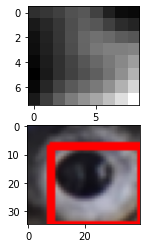

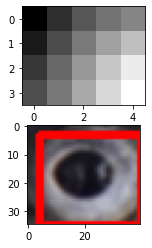

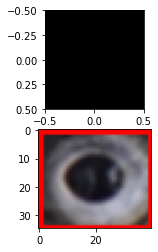

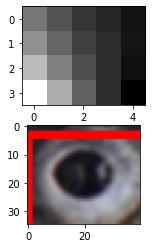

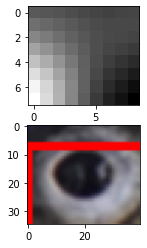

In [57]:
# debug
temp5 = cv2.imread('../data/templates/eye5.png')
templst = [np.copy(temp5)]

path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# for f in 
for f in onlyfiles[10:11]:
    image = cv2.imread('../data/templates/eye3.png')
    img = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
    scorelst = []
    reslst = []
    scalelst = []
    best_temps = []
    for temp0 in templst: 
        match_score, res, scale, best_temp = match(img, temp0, method = cv2.TM_CCORR_NORMED)
        scorelst.append(match_score)
        reslst.append(res)
        scalelst.append(scale)
        best_temps.append(best_temp)
    idx = np.array(scorelst).argmax()
    print(f)
    print(idx, scorelst[idx])
    
    h, w = best_temps[idx].shape[0:2]
    loc = np.unravel_index(reslst[idx].argmax(), reslst[idx].shape)
    print(loc)
    # remove the highest spot: 
    reslst[idx][loc[0], loc[1]] = 0
    loc = np.unravel_index(reslst[idx].argmax(), reslst[idx].shape)
    print(loc)
    # draw the template: 
    cornerr = loc[0]
    cornerc = loc[1]
    image_out = cv2.rectangle(img, (cornerc, cornerr), (cornerc + w, cornerr + h), (0, 0, 255), 2)
    print(idx)
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
    ax0.imshow(best_temps[idx])
    ax1.imshow(reslst[idx],cmap=plt.cm.gray)
    ax2.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB))   

DSC00849.JPG
0 0.86513066
(0, 5)
(0, 6)
0


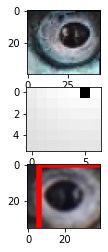

In [66]:
temp1 = cv2.imread('../data/templates/eye1.png')
# temp1 = cv2.gaussianBlur(temp1, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE) 
temp2 = cv2.imread('../data/templates/eye2.png')
# temp2 = cv2.gaussianBlur(temp2, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE) 
 
temp3 = cv2.imread('../data/templates/eye3.png')
# temp3 = cv2.gaussianBlur(temp2, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
temp4 = cv2.imread('../data/templates/eye4.png')
# temp4 = cv2.gaussianBlur(temp4, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
# print(temp1.shape, temp2.shape, temp3.shape)
# templst = [np.copy(temp1), np.copy(temp2), np.copy(temp3), np.copy(temp4)]
temp5 = cv2.imread('../data/templates/eye5.png')
templst = [np.copy(temp5)]

path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# for f in 
for f in onlyfiles[10:11]:
# for i in ['DSC00840.jpg', 'DSC00841.jpg', 'DSC00842.jpg', 'DSC00843.jpg']:
    image = cv2.imread('../data/templates/eye3.png')
#     image = cv2.imread(join(path, f))
# image = cv2.imread('../data/CC Lake extracted/5/DSC00839.jpg')
    img = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
    scorelst = []
    reslst = []
    scalelst = []
    best_temps = []
    for temp0 in templst: 
        match_score, res, scale, best_temp = match(img, temp0, method = cv2.TM_CCORR_NORMED)
        scorelst.append(match_score)
        reslst.append(res)
        scalelst.append(scale)
        best_temps.append(best_temp)
    idx = np.array(scorelst).argmax()
    print(f)
    print(idx, scorelst[idx])
    
    h, w = best_temps[idx].shape[0:2]
    loc = np.unravel_index(reslst[idx].argmax(), reslst[idx].shape)
    print(loc)
    # remove the highest spot: 
    reslst[idx][loc[0], loc[1]] = 0
    loc = np.unravel_index(reslst[idx].argmax(), reslst[idx].shape)
    print(loc)
    # draw the template: 
    cornerr = loc[0]
    cornerc = loc[1]
    image_out = cv2.rectangle(img, (cornerc, cornerr), (cornerc + w, cornerr + h), (0, 0, 255), 2)
    print(idx)
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
    ax0.imshow(best_temps[idx])
    ax1.imshow(reslst[idx],cmap=plt.cm.gray)
    ax2.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB))

In [ ]:
image = cv2.imread('../data/CC Lake extracted/5/DSC00849.JPG');
RGBImage = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)

YIQ = np.zeros_like(image)
YIQ[:,:,0] = 0.299*RGBImage[:,:,0] + 0.587*RGBImage[:,:,1] + 0.114*RGBImage[:,:,2]
YIQ[:,:,1] = 0.596*RGBImage[:,:,0] - 0.274*RGBImage[:,:,1] - 0.322*RGBImage[:,:,2]
YIQ[:,:,2] = 0.211*RGBImage[:,:,0] - 0.523*RGBImage[:,:,1] + 0.312*RGBImage[:,:,2]

plt.imshow(YIQ)

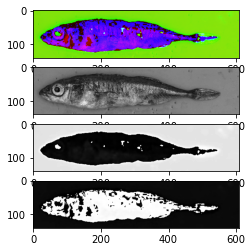

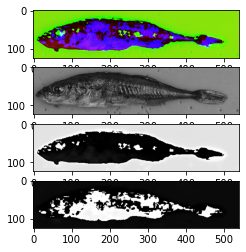

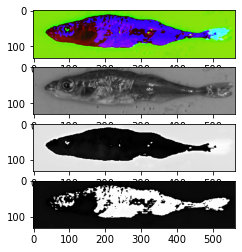

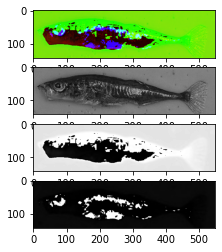

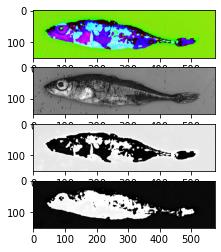

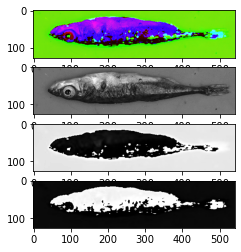

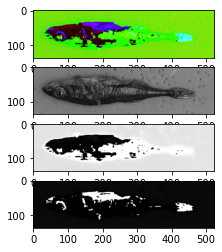

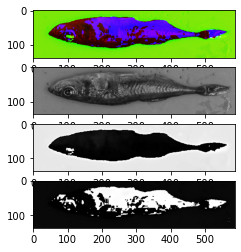

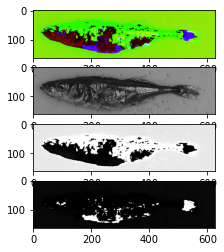

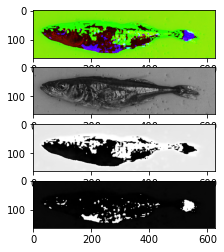

In [16]:
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for f in onlyfiles[5:15]:
# for i in ['DSC00840.jpg', 'DSC00841.jpg', 'DSC00842.jpg', 'DSC00843.jpg']:
    image = cv2.imread(join(path, f))
    RGBImage = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)
    YIQ = np.zeros_like(image)
    YIQ[:,:,0] = 0.299*RGBImage[:,:,0] + 0.587*RGBImage[:,:,1] + 0.114*RGBImage[:,:,2]
    YIQ[:,:,1] = 0.596*RGBImage[:,:,0] - 0.274*RGBImage[:,:,1] - 0.322*RGBImage[:,:,2]
    YIQ[:,:,2] = 0.211*RGBImage[:,:,0] - 0.523*RGBImage[:,:,1] + 0.312*RGBImage[:,:,2]
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1)
    ax0.imshow(YIQ)
    ax1.imshow(YIQ[:, :, 0], cmap=plt.cm.gray)
    ax2.imshow(YIQ[:, :, 1], cmap=plt.cm.gray)
    ax3.imshow(YIQ[:, :, 2], cmap=plt.cm.gray)

uint8
255 255


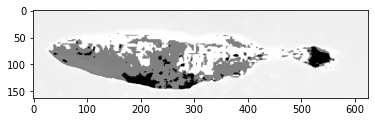

In [25]:
# get chrominance values
print(YIQ.dtype)
print(np.max(YIQ[:, :, 1]), np.max(YIQ[:, :, 2]))
Chrom = np.mean(np.array([YIQ[:, :, 1]/255, (1-YIQ[:, :, 2]/255)]), axis=0)
plt.imshow(Chrom, cmap=plt.cm.gray)

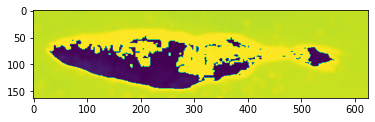

In [31]:
# dilation and erosion
dilation = cv2.dilate(YIQ[:, :, 1], cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (3, 3)))
plt.imshow(dilation)

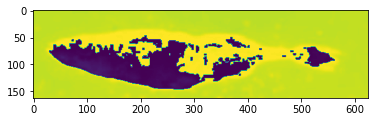

In [32]:
# erosion
erosion = cv2.erode(dilation, cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (3, 3)))
plt.imshow(erosion)

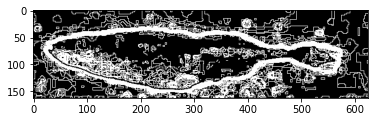

In [33]:
diff = erosion - dilation
plt.imshow(diff, cmap=plt.cm.gray)